<a href="https://colab.research.google.com/github/jeslynlamxy/dna-sequence-searching/blob/main/speed_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Getting files in
# from google.colab import files
# uploaded = files.upload()

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Get dir
!ls '/content/gdrive/My Drive/NTU/CURRENT SEM/CZ2001 ALGO Project'

'ALOGO DNA'				  salmonella_bf_searching_analysis.csv
'Copy of Presentation - Algo 1.gslides'   salmonella_bm_searching_analysis.csv
'Copy of Report - Algo 1.gdoc'		  salmonella.fna
'Copy of Report - Algo 1 zzzz.gdoc'	  search_algo.py
 covid_bf_searching_analysis.csv	  search_benchmarking.py
 covid_bm_searching_analysis.csv	  semi_brute_force.py
 covid.fna				  speed_analysis.ipynb
 covid_kmp_searching_analysis.csv	  test_fixed_genome.csv
 covid_rk_searching_analysis.csv	  test_fixed_query.csv
 covid_sbf_searching_analysis.csv


In [3]:
# Imports
import os
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Fixed files
data_dir = '/content/gdrive/My Drive/NTU/CURRENT SEM/CZ2001 ALGO Project'

test_fixed_genome = os.path.join(data_dir, 'test_fixed_genome.csv')
test_fixed_query = os.path.join(data_dir, 'test_fixed_query.csv')

bf_file =  os.path.join(data_dir, 'covid_bf_searching_analysis.csv')
bm_file = os.path.join(data_dir, 'covid_bm_searching_analysis.csv')
rk_file = os.path.join(data_dir, 'covid_rk_searching_analysis.csv')
kmp_file =  os.path.join(data_dir, 'covid_kmp_searching_analysis.csv')
sbf_file =  os.path.join(data_dir, 'covid_sbf_searching_analysis.csv')

In [6]:
# Create df
test_fixed_genome_df = pd.read_csv(test_fixed_genome)
test_fixed_query_df = pd.read_csv(test_fixed_query)

In [7]:
bf_df = pd.read_csv(bf_file)
bm_df = pd.read_csv(bm_file)
rk_df = pd.read_csv(rk_file)
kmp_df = pd.read_csv(kmp_file)
sbf_df = pd.read_csv(sbf_file)

# Simulate search and plot time taken as fna size increases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


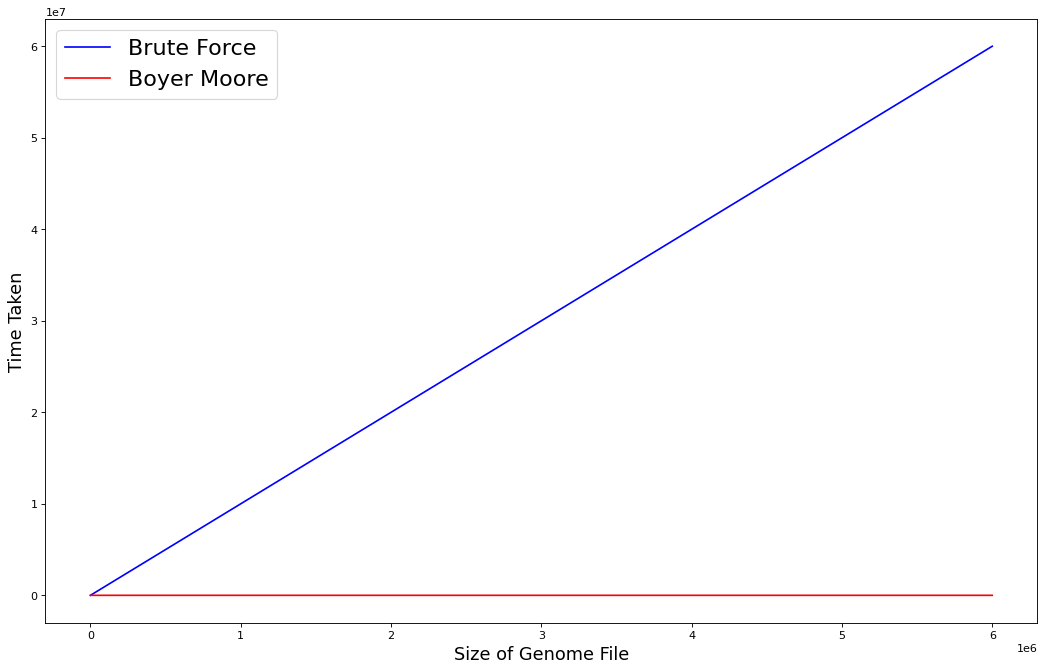

In [8]:
#  O(m*n). The m is the size of pattern and n is the size of the main string.
def bf(n, m):
    return m*(n-m+1)

def bm(n, m):
    return m/n

n = np.arange(0, 6000000)
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n, bf(n, 10), c="blue")
plt.plot(n, bm(n, 10), c='red')
plt.xlabel('Size of Genome File', fontsize=16)
plt.ylabel('Time Taken', fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore'], loc='best', fontsize=20)

# Our test results to match simulation
# Tests on randomly generated dna

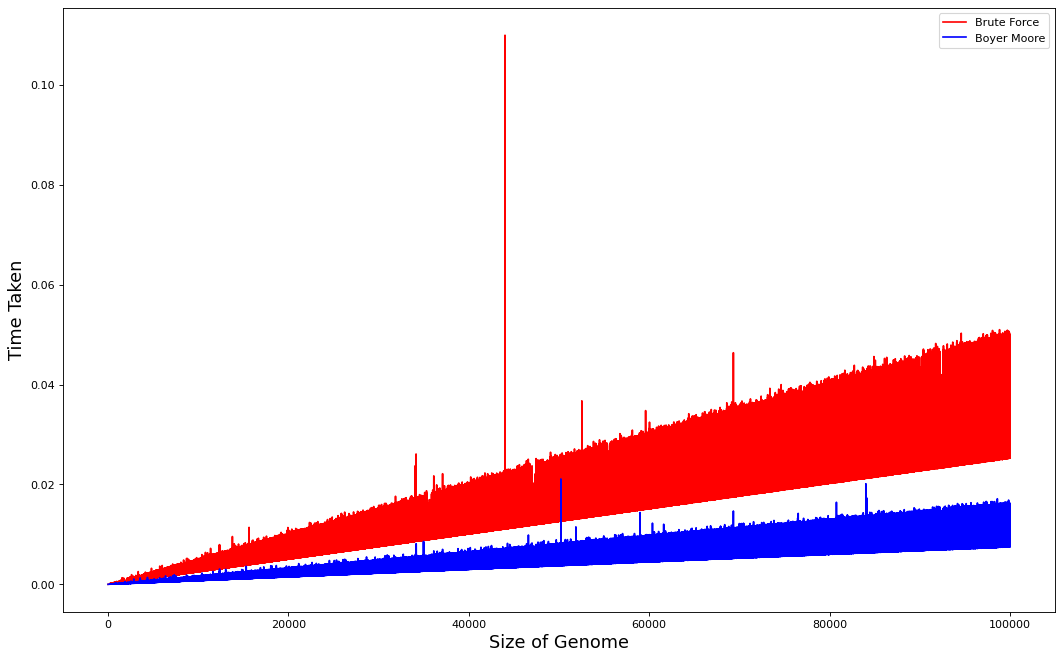

In [9]:
# Boyer moore
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(test_fixed_query_df['Genome Size'],  test_fixed_query_df['BF Time'], c='red')
plt.plot(test_fixed_query_df['Genome Size'], test_fixed_query_df['BM Time'], c='blue')
plt.xlabel("Size of Genome", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore'], loc='best', fontsize=10)

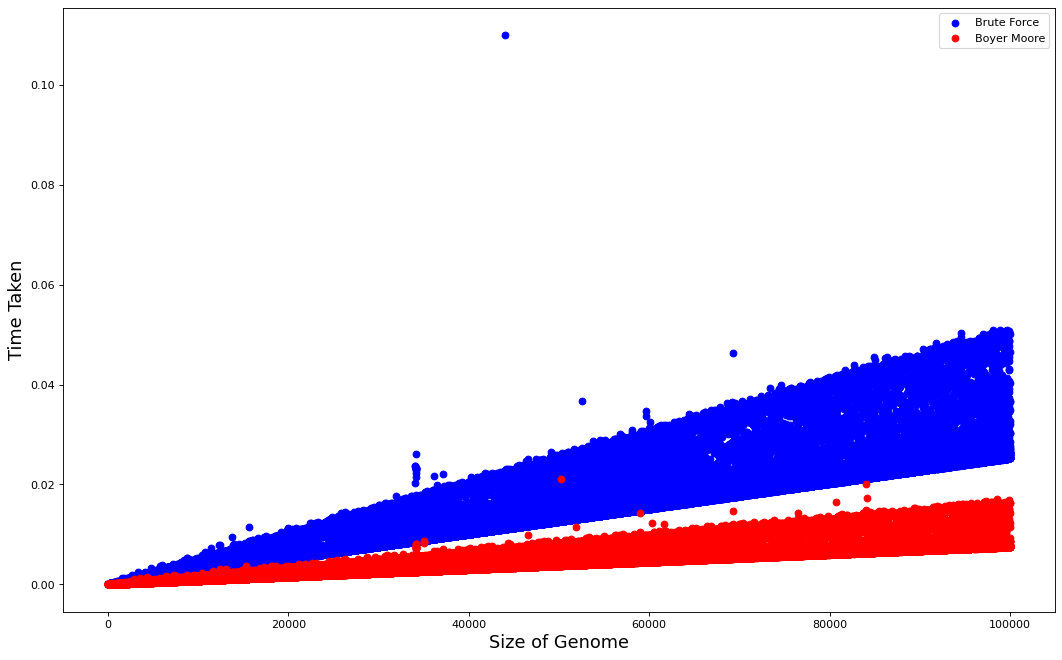

In [10]:
# Boyer moore dots
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(test_fixed_query_df['Genome Size'],  test_fixed_query_df['BF Time'], c='blue')
plt.scatter(test_fixed_query_df['Genome Size'], test_fixed_query_df['BM Time'], c='red')
plt.xlabel("Size of Genome", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10)

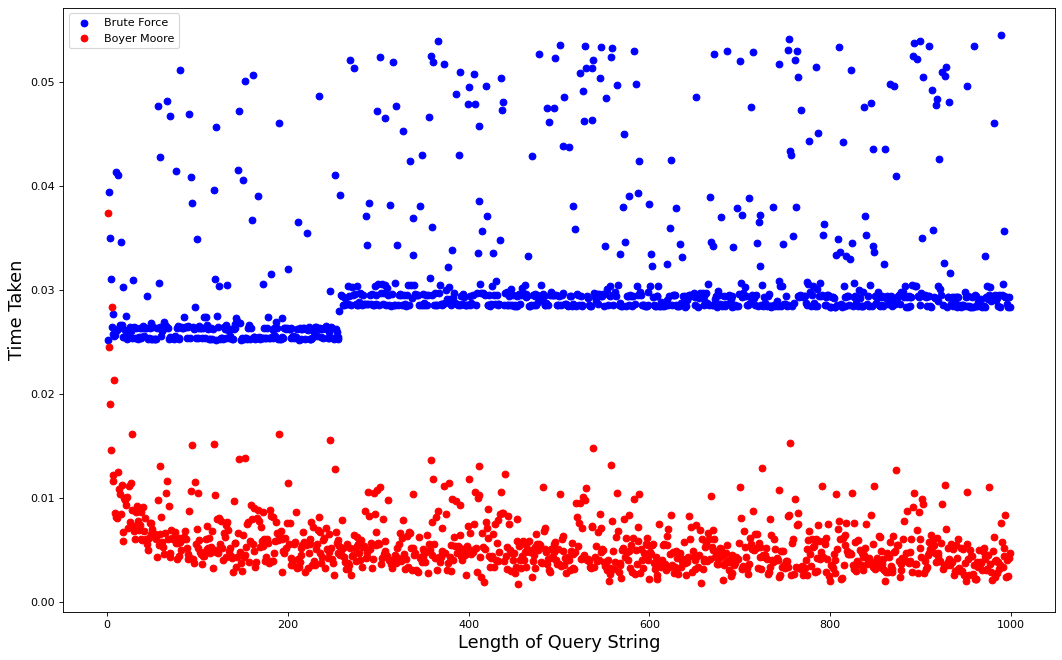

In [11]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BF Time'], c='blue')
plt.scatter(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BM Time'], c='red')
# plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['RK Time'], c='black')
plt.xlabel("Length of Query String", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10)

# Deep dive into boyer moore

In [12]:
def get_num_of_unique_chars(provided_string):
  return len(''.join(set(provided_string)))
df = pd.read_csv(bm_file)
df['Unique'] = df['Query'].apply(get_num_of_unique_chars)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

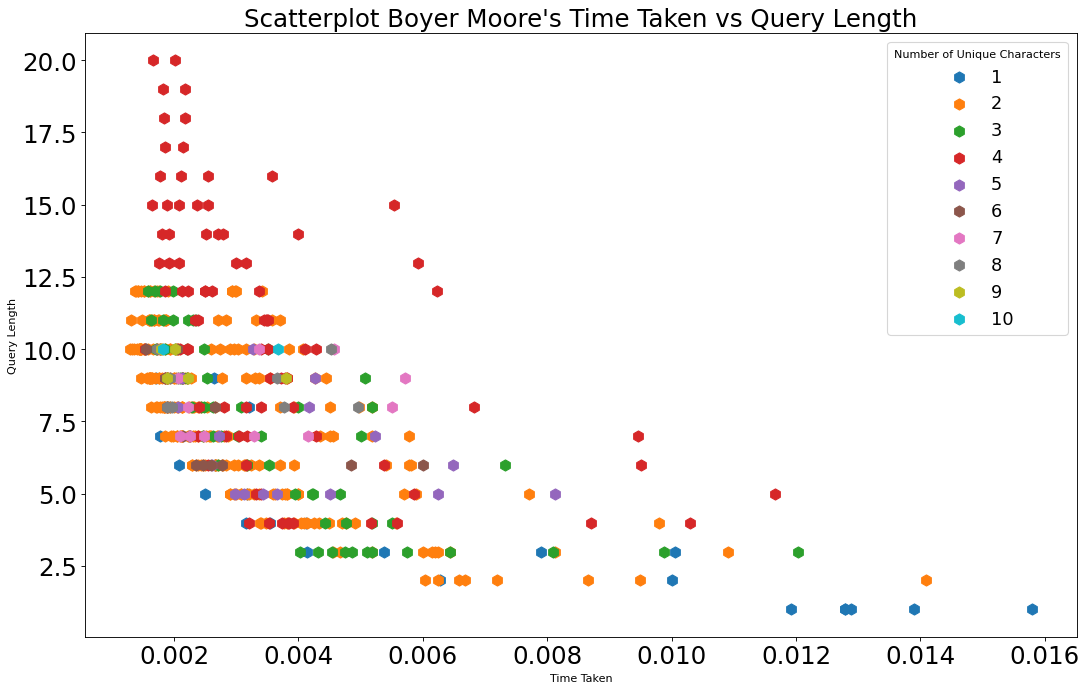

In [13]:
0# Prepare Data 
categories = np.unique(df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=df.loc[df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Boyer Moore's Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()    

In [14]:
new_df = df.loc[df['Time Taken'] >= 0.008].sort_values(by=['Time Taken'], ascending=False)

# Looking at slow searches for boyer moore

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

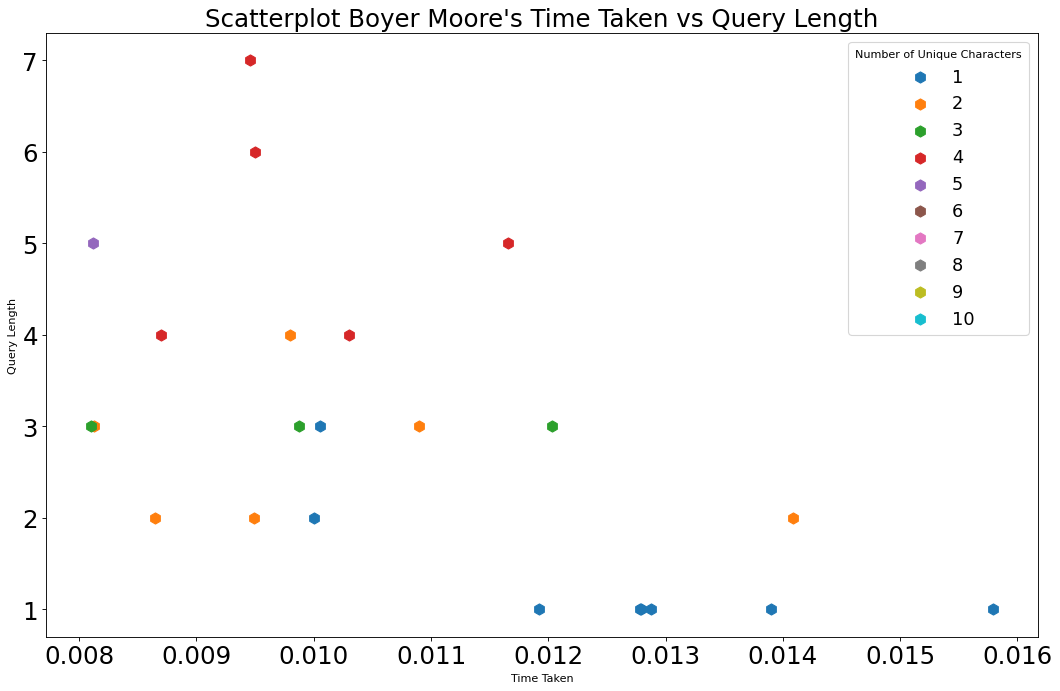

In [15]:
0# Prepare Data 
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=new_df.loc[new_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Boyer Moore's Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()    

In [16]:
# Analyse odd cases (why slower)
new_df.sort_values(by=['Time Taken'], ascending=False).head(5)

,Unnamed: 0,Query,Query Length,Time Taken,Search Successful,Position Placed,Unique
0,0,A,1,0.01579,True,3628,1
355,355,CB,2,0.01409,True,180,2
251,251,B,1,0.01390,True,1573,1
415,415,E,1,0.01288,True,4600,1
435,435,J,1,0.01279,True,3103,1


# Performance for all 5 algorithms plotted

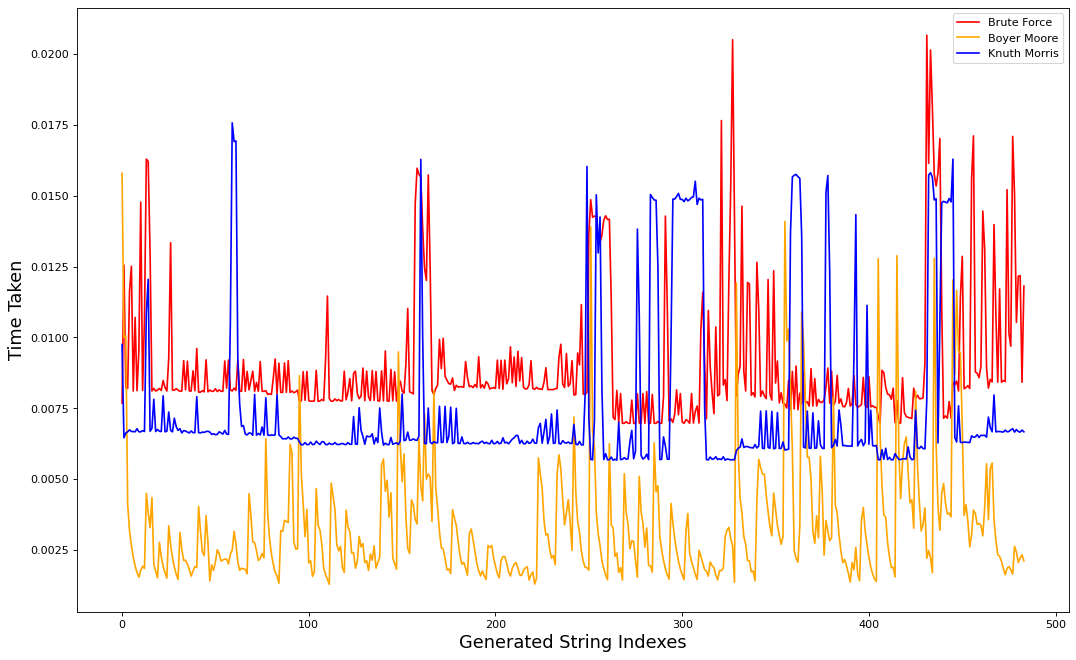

In [17]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(bf_df['Unnamed: 0'],  bf_df['Time Taken'], c='red')
plt.plot(bm_df['Unnamed: 0'],  bm_df['Time Taken'], c='orange')
# plt.plot(rk_df['Unnamed: 0'],  rk_df['Time Taken'], c='black')
plt.plot(kmp_df['Unnamed: 0'],  kmp_df['Time Taken'], c='blue')
# plt.plot(sbf_df['Unnamed: 0'],  sbf_df['Time Taken'], c='purple')


plt.xlabel("Generated String Indexes", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Knuth Morris', 'Semi Brute Force'], loc='best', fontsize=10)

In [18]:
waplt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(bf_df['Unnamed: 0'],  bf_df['Time Taken'], c='red')
plt.plot(bm_df['Unnamed: 0'],  bm_df['Time Taken'], c='orange')


plt.xlabel("Generated String Indexes", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore'], loc='best', fontsize=10)

NameError: ignored

# Seeing if time taken would increase as the query string increases in length

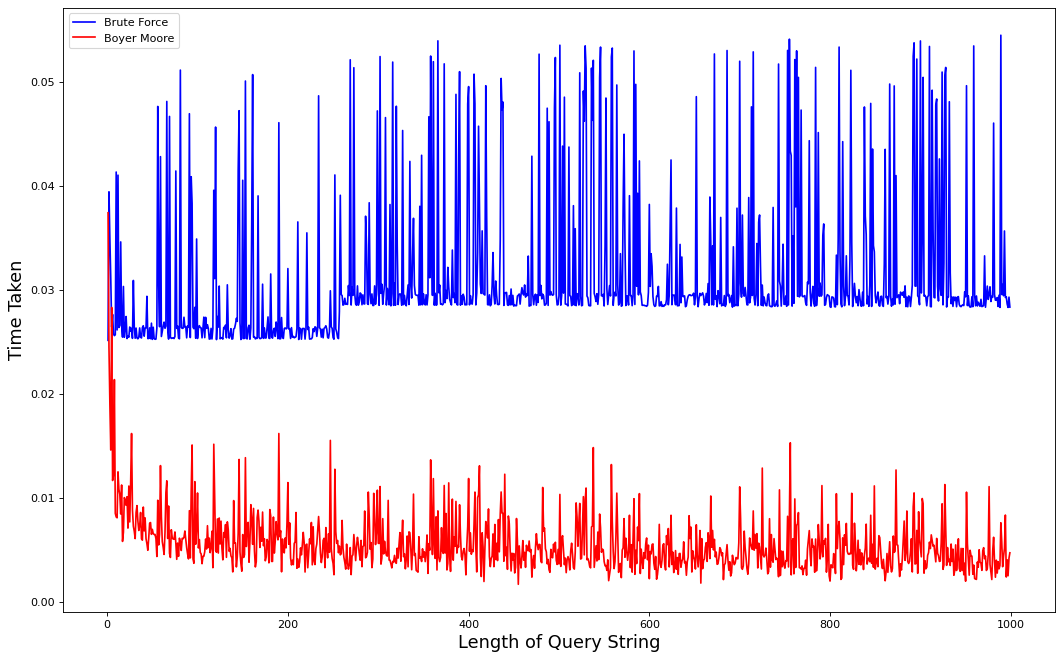

In [19]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BF Time'], c='blue')
plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['BM Time'], c='red')
# plt.plot(test_fixed_genome_df['Query Size'], test_fixed_genome_df['RK Time'], c='black')
plt.xlabel("Length of Query String", fontsize=16)
plt.ylabel("Time Taken", fontsize=16)
plt.legend(['Brute Force', 'Boyer Moore', 'Rabin Karp'], loc='best', fontsize=10)

# Seems like there is occurence where bf is faster than bm

In [20]:
# When bf faster than bm
new_test_fixed_genome_df = test_fixed_genome_df.loc[test_fixed_genome_df['BM Time'] >= 0.02].sort_values(by=['BF Time'], ascending=True)
new_test_fixed_genome_df.head()

,Unnamed: 0,Query Size,BF Time,BM Time,RK Time,KMP Time,SBF Time
0,0,1,0.02515,0.03740,0.16559,0.03122,0.03632
7,7,8,0.02560,0.02138,0.18129,0.02283,0.05334
4,4,5,0.02645,0.02831,0.16652,0.02248,0.04538
1,1,2,0.03941,0.02451,0.17029,0.02357,0.02920


# Comparing different plots
# Does unique characters affect plots for differnt algorithm

In [21]:
# View data
bf_file_df = pd.read_csv(bf_file)
bf_file_df['Unique'] = bf_file_df['Query'].apply(get_num_of_unique_chars)

bm_file_df = pd.read_csv(bm_file)
bm_file_df['Unique'] = bm_file_df['Query'].apply(get_num_of_unique_chars)

rk_file_df = pd.read_csv(rk_file)
rk_file_df['Unique'] = rk_file_df['Query'].apply(get_num_of_unique_chars)

kmp_file_df = pd.read_csv(kmp_file)
kmp_file_df['Unique'] = kmp_file_df['Query'].apply(get_num_of_unique_chars)

sbf_file_df = pd.read_csv(sbf_file)
sbf_file_df['Unique'] = sbf_file_df['Query'].apply(get_num_of_unique_chars)

# Brute force


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

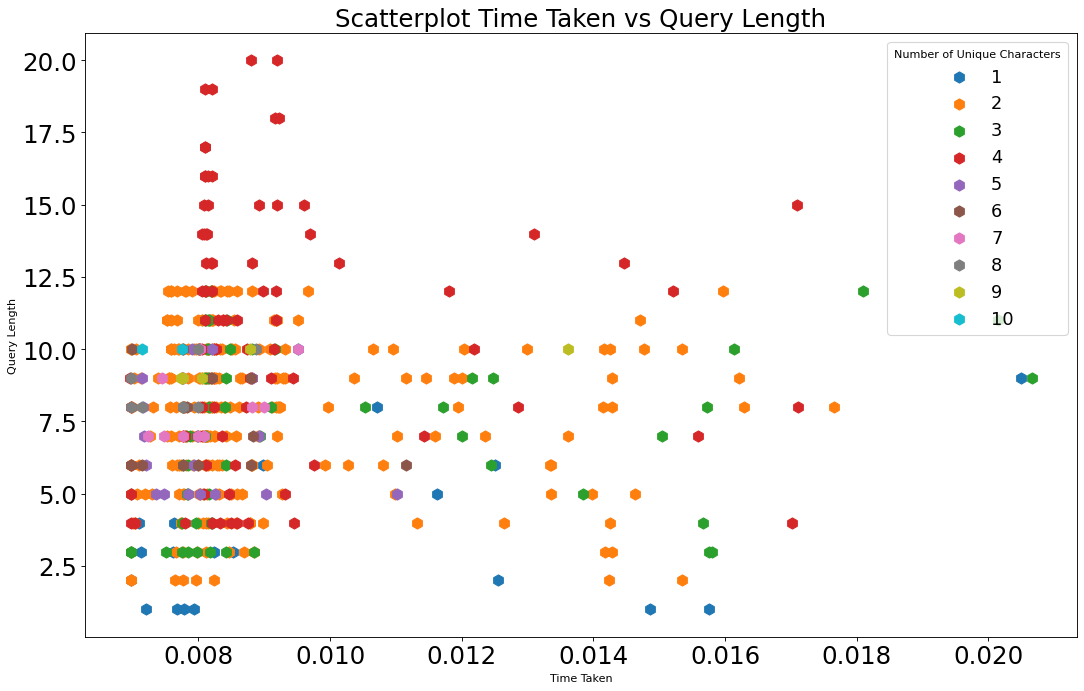

In [22]:
# Prepare Data 
categories = np.unique(bf_file_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=bf_file_df.loc[bf_file_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()

# Boyer moore


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

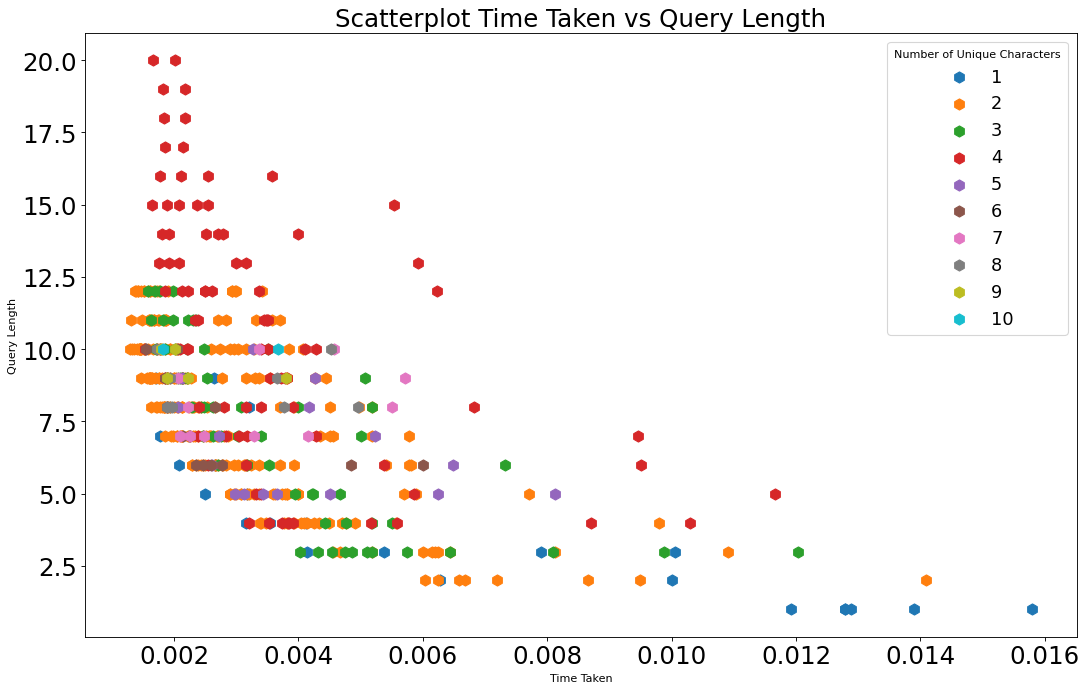

In [23]:
# Prepare Data 
categories = np.unique(bm_file_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=bm_file_df.loc[bm_file_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()  

# Semi brute force


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

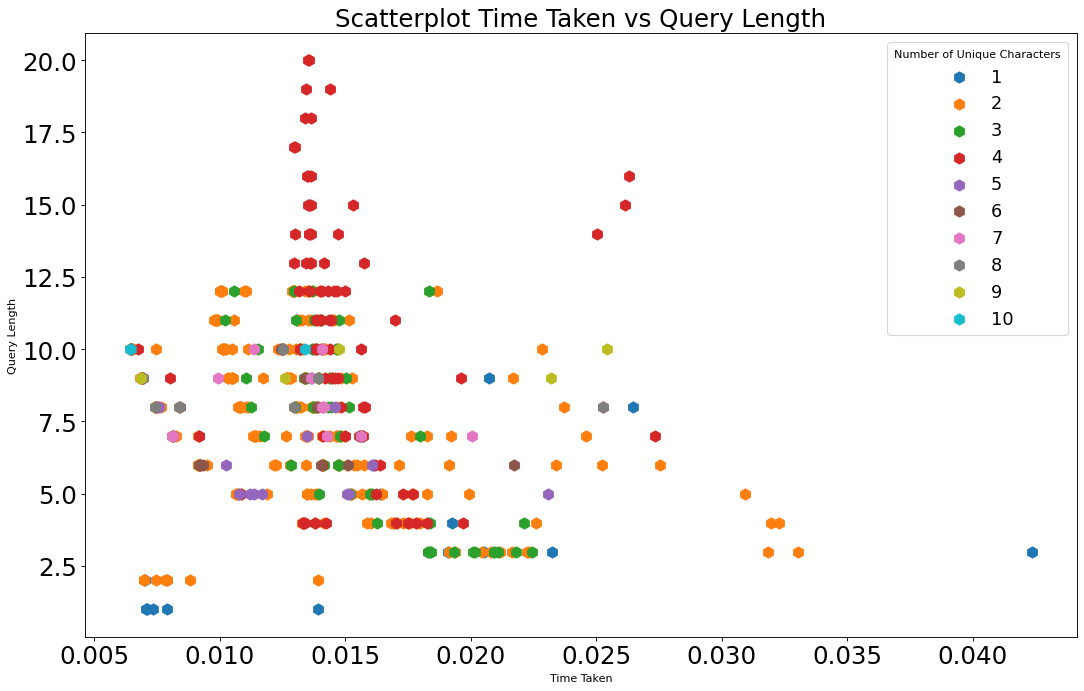

In [24]:
# Prepare Data 
categories = np.unique(sbf_file_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=sbf_file_df.loc[sbf_file_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()  

# Rabin karp


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

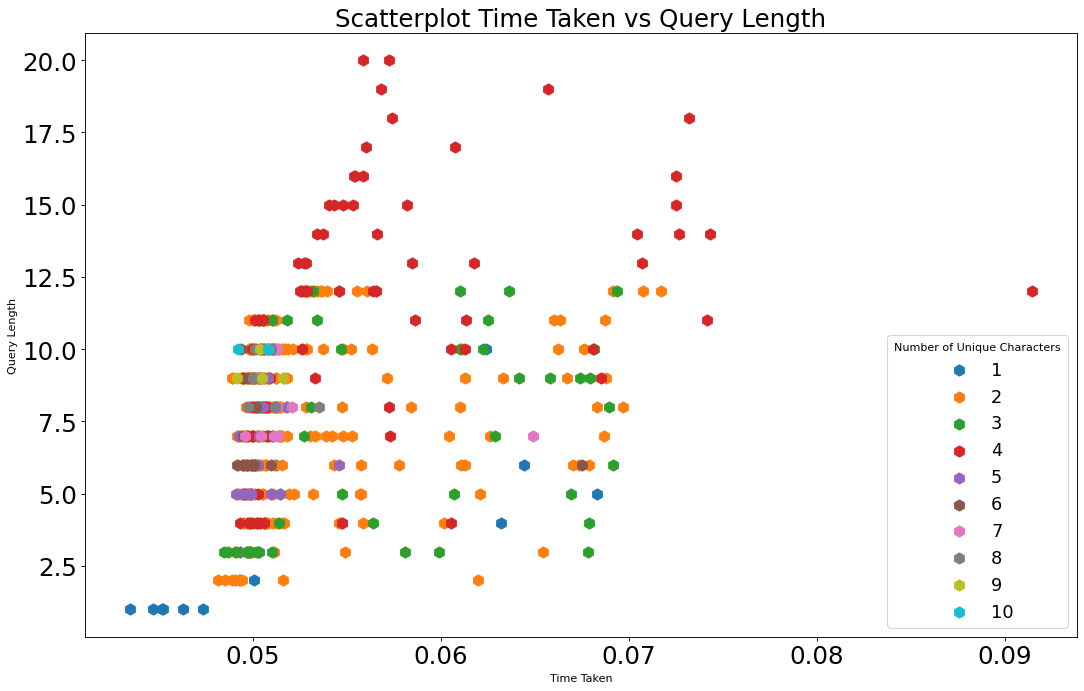

In [25]:
# Prepare Data 
categories = np.unique(rk_file_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=rk_file_df.loc[rk_file_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()  

# Knuth morris

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

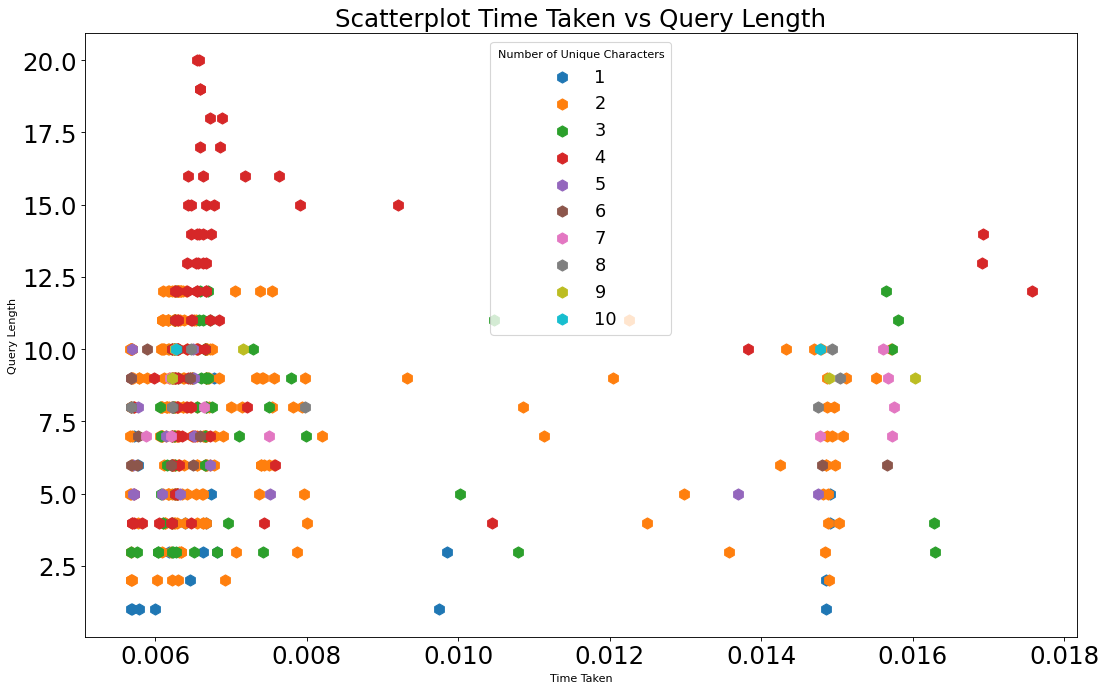

In [26]:
# Prepare Data 
categories = np.unique(kmp_file_df['Unique'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Time Taken', 'Query Length', marker='h',
                data=kmp_file_df.loc[kmp_file_df.Unique==category, :], 
                s=100, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.xticks(fontsize=22); plt.yticks(fontsize=22)
plt.title("Scatterplot Time Taken vs Query Length", fontsize=22)
plt.legend(title="Number of Unique Characters", fontsize=16, facecolor="white")    
plt.show()  

# Does query length affect speed

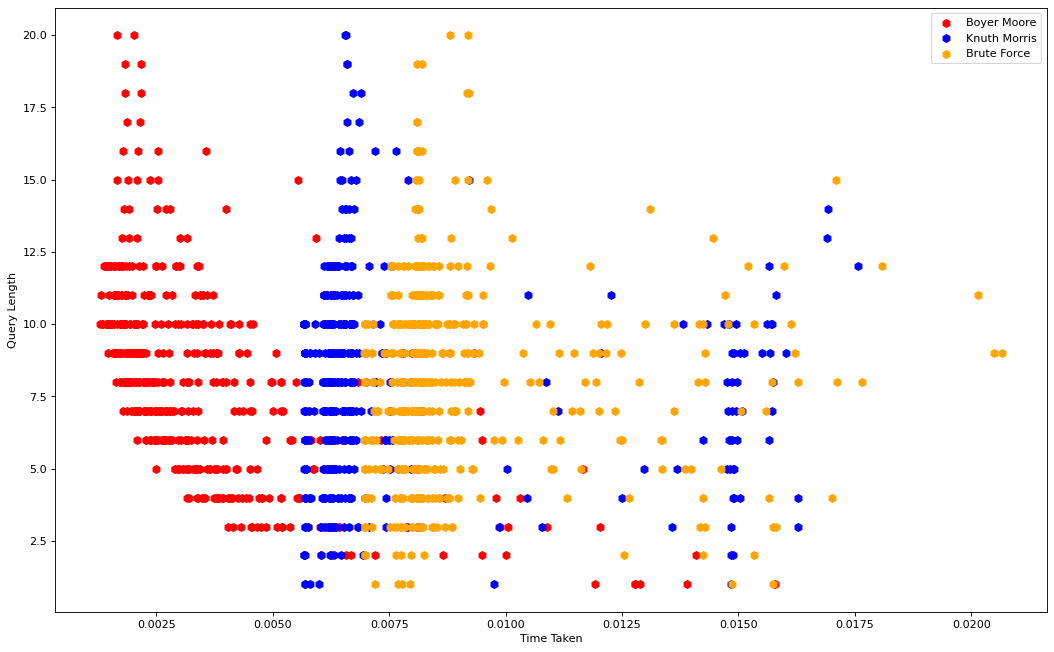

In [28]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.scatter(bm_file_df['Time Taken'], bm_file_df['Query Length'], marker='h', s=50, c="red")
# plt.scatter(rk_file_df['Time Taken'], rk_file_df['Query Length'], marker='h', s=50, c="black")
plt.scatter(kmp_file_df['Time Taken'], kmp_file_df['Query Length'], marker='h', s=50, c="blue")
# plt.scatter(sbf_file_df['Time Taken'], sbf_file_df['Query Length'], marker='h', s=50, c="purple")
plt.scatter(bf_file_df['Time Taken'], bf_file_df['Query Length'], marker='h', s=50, c="orange")
plt.gca().set(xlabel='Time Taken', ylabel='Query Length')
plt.legend(['Boyer Moore', 'Knuth Morris', 'Brute Force'], loc='best', fontsize=10)